# Règles de la toile de confiance

La toile de confiance de Duniter repose sur un ensemble de règles que nous allons illustrer. Pour mieux comprendre ces règles, lisez l'article [la toile de confiance en détail](https://duniter.fr/wiki/toile-de-confiance/la-toile-de-confiance-en-detail/).

## Certifications et membre référent

Sans rentrer dans les détails, nous proposons une définition illustrée de différents termes de vocabulaire nécessaire à la définition de membre référent. Cela nous permet également d'explorer certaines possibilités de Julia et LightGraphs. Veuillez lire le code attentivement, j'y introduis plusieurs exemples important pour l'utilisation de Julia.

degré de A vaut 5
degré entrant de A vaut 2
degré sortant de A vaut 4


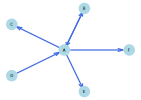

In [1]:
# illustration des degrés d'un noeud

using LightGraphs, GraphPlot
using Colors

# crée un graphe dirigé (les liens ont une direction) et ajoute des liens
g = SimpleDiGraph(6)
add_edge!(g, 2, 1)
add_edge!(g, 1, 2)
add_edge!(g, 1, 3)
add_edge!(g, 4, 1)
add_edge!(g, 1, 5)
add_edge!(g, 1, 6)

# donne un nom aux liens et calcule une position fixe
names = [l for l in "ABCDEF"]
r = ones(6); r[1] = 0;
θ = [2i*π/5 for i in 0:5]
c = r .* exp.(θ*1im)
x, y = real.(c), imag.(c)

# écrit les degrés de A
println("degré de A vaut $(length(all_neighbors(g, 1)))") # attention à la définition de la fonction degree !
println("degré entrant de A vaut $(indegree(g, 1))")
println("degré sortant de A vaut $(outdegree(g, 1))")

# affiche le graphe avec des couleurs personnalisées
gplot(g, x, -y, nodelabel=names, nodefillc=colorant"lightblue", edgestrokec=colorant"royalblue")

Pour entrer dans la toile de confiance, il faut avoir reçu au moins `sigQty` certifications, c'est-à-dire avoir un *degré entrant* supérieur ou égal à 5 dans le cas de la ğ1.

Un membre ne peut pas avoir un *degré sortant* supérieur à `sigStock`. Dans la ğ1, cette limite est fixée à 100. 

Les degrés sont également utilisés dans la définition de *membre référent*. On dit d'un membre qu'il est *référent* si ses deux demi-degrés sont superieurs ou égaux à `ceil(N^(1/stepMax))` où `N` est le nombre total de membres et `stepMax` un paramètre de la toile (fixé à 5 dans la ğ1). Écrivons donc une fonction qui nous donne le statut de référent (`true` ou `false`) pour chaque noeud d'un graphe.

In [2]:
using Test # module de test pour tester les fonctions

"""la fonction referent(g) retourne un vecteur de booléen correspondant au statut de référent"""
function referent(g::AbstractGraph)::Vector{Bool}
    N = nv(g) # nombre de noeuds
    mindeg = Int(ceil(N^0.2)) # degré minimum pour être référent (entier)
    return [(outdegree(g,i) >= mindeg && indegree(g,i) >= mindeg) for i in 1:N]
end

# on teste la fonction sur le graphe précédent
@test referent(g) == [true, false, false, false, false, false]
# seul le noeud A a ses deux degrés supérieurs ou égaux à ceil(6^0.2) = 2

Test Passed

## Règle de distance

Pour rentrer dans la toile de confiance, en plus des cinq certifications, il faut satisfaire un critère de distance. La règle de distance s'appuie sur la définition de chemin que nous allons illustrer ici.

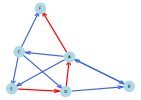

In [3]:
# illustration du chemin
add_edge!(g, 3, 4)
add_edge!(g, 3, 5)
add_edge!(g, 4, 2)
add_edge!(g, 3, 6)
add_edge!(g, 5, 4)

# (documentation) https://juliagraphs.org/LightGraphs.jl/stable/pathing/#Shortest-Path-Algorithms-1
shortest_path = a_star(g,5,6)
edgecolors = [edge in shortest_path ? colorant"red" : colorant"royalblue" for edge in edges(g)]

gplot(g, nodelabel=names, edgestrokec=edgecolors, nodefillc=colorant"lightblue")

In [4]:
print("le chemin le plus court de E vers F est le chemin (E) → ")
println(join(["("*names[e.dst]*")" for e in shortest_path], " → "))

le chemin le plus court de E vers F est le chemin (E) → (D) → (A) → (F)


Le chemin de E vers F en "marche avant" revient à un chemin de F vers E en "marche arrière". On peut ainsi définir la règle de distance en considérent l'ensemble des chemins en marche arrière :

> un membre respecte la règle de distance si l'ensemble de ses chemins en "marche arrière" de longueur inférieure ou égale à `stepMax` passe par une proportion supérieure ou égale à `xPercent` des membres référents

Dans la ğ1, `stepMax` vaut 5 et `xPercent` vaut 0.8. Ainsi, quand un nouveau membre entre dans la toile de confiance, au moins 80% des membres référents peuvent trouver un chemin de certifications vers lui d'une longueur inférieur ou égale à 5.

## Conclusion

Nous avons introduit certains concepts fondamentaux des graphes pour décrire des aspects statiques de la toile de confiance ğ1. Mais la plupart des règles sont liés à son aspect évolutif. Nous allons aborder ces aspect dynamiques dans la prochaine partie.